## Data Understanding

In [ ]:
# Import libraries
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

# Text Processing
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, StratifiedKFold

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from joblib import Parallel, delayed

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import dataset
MBTI_DS = pd.read_csv('mbti_1.csv', sep=',', engine='python', encoding='utf-8')
MBTI_DS

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [ ]:
# Check missing values
MBTI_DS.isnull().any()

type     False
posts    False
dtype: bool

In [ ]:
# Check number of rows and columns
nRow, nCol = MBTI_DS.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [ ]:
# Check data types
MBTI_DS.dtypes

type     object
posts    object
dtype: object

In [ ]:
MBTI_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
MBTI_DS.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


Number of columns is 2. <br>
Number of rows is 8675. <br>
Number of observations is 1832. <br>
No null values in MBTI dataset. <br>
All values are textual, so we should convert to numeric form to train the machine learning model. <br>
There are 16 unique personality type indicators in the dataset. <br>
INFP is the most frequently occuring personality type. <br>


In [ ]:
total = MBTI_DS.groupby(['type']).count()*50 # each row contains 50 posts
print("Total Posts for every Personality Type")
total

Total Posts for every Personality Type


,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total number of post for each personality type')

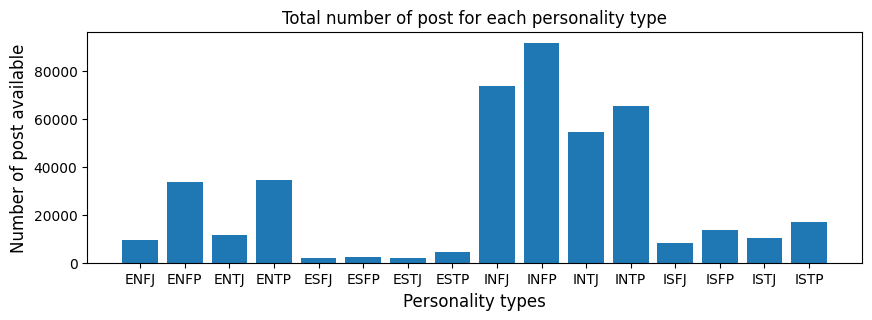

In [ ]:
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number of post available', size = 12)
plt.title('Total number of post for each personality type')

The MBTI dataset is unbalanced throughout different classes. Some personality types has more data than others.

In [ ]:
#Finding the most common words in all posts.
words = list(MBTI_DS["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

The posts contain general words like I, to, the, a, and, of, is, you, etc. <br>
These words don't really provide any useful information to train the machine learning model as most of them are stop-words.

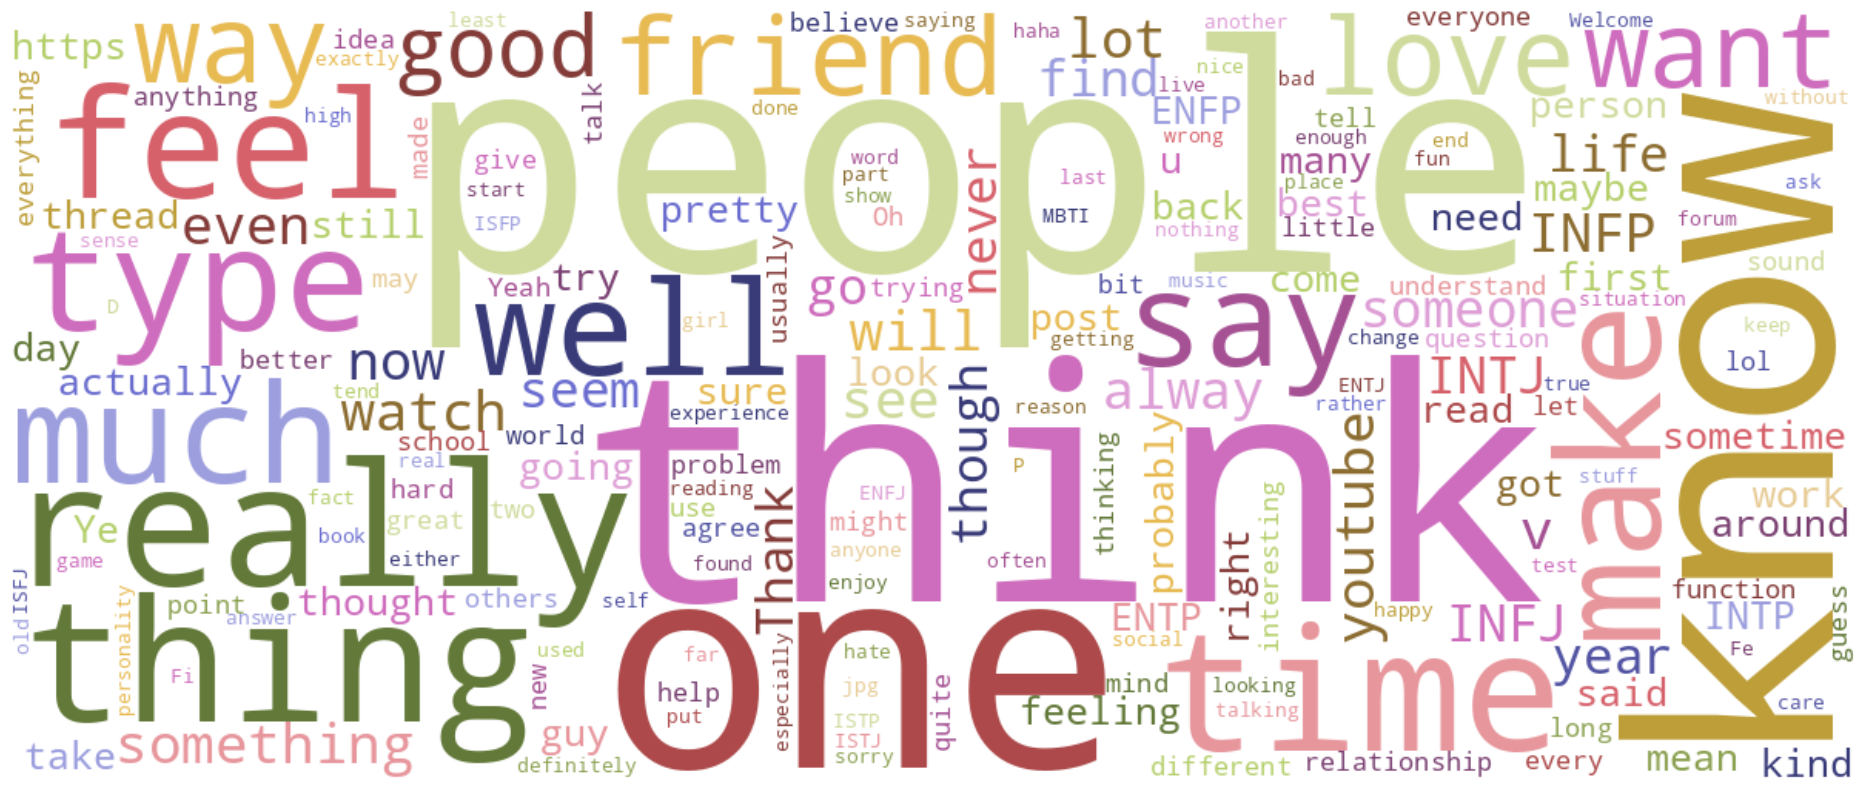

In [ ]:
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

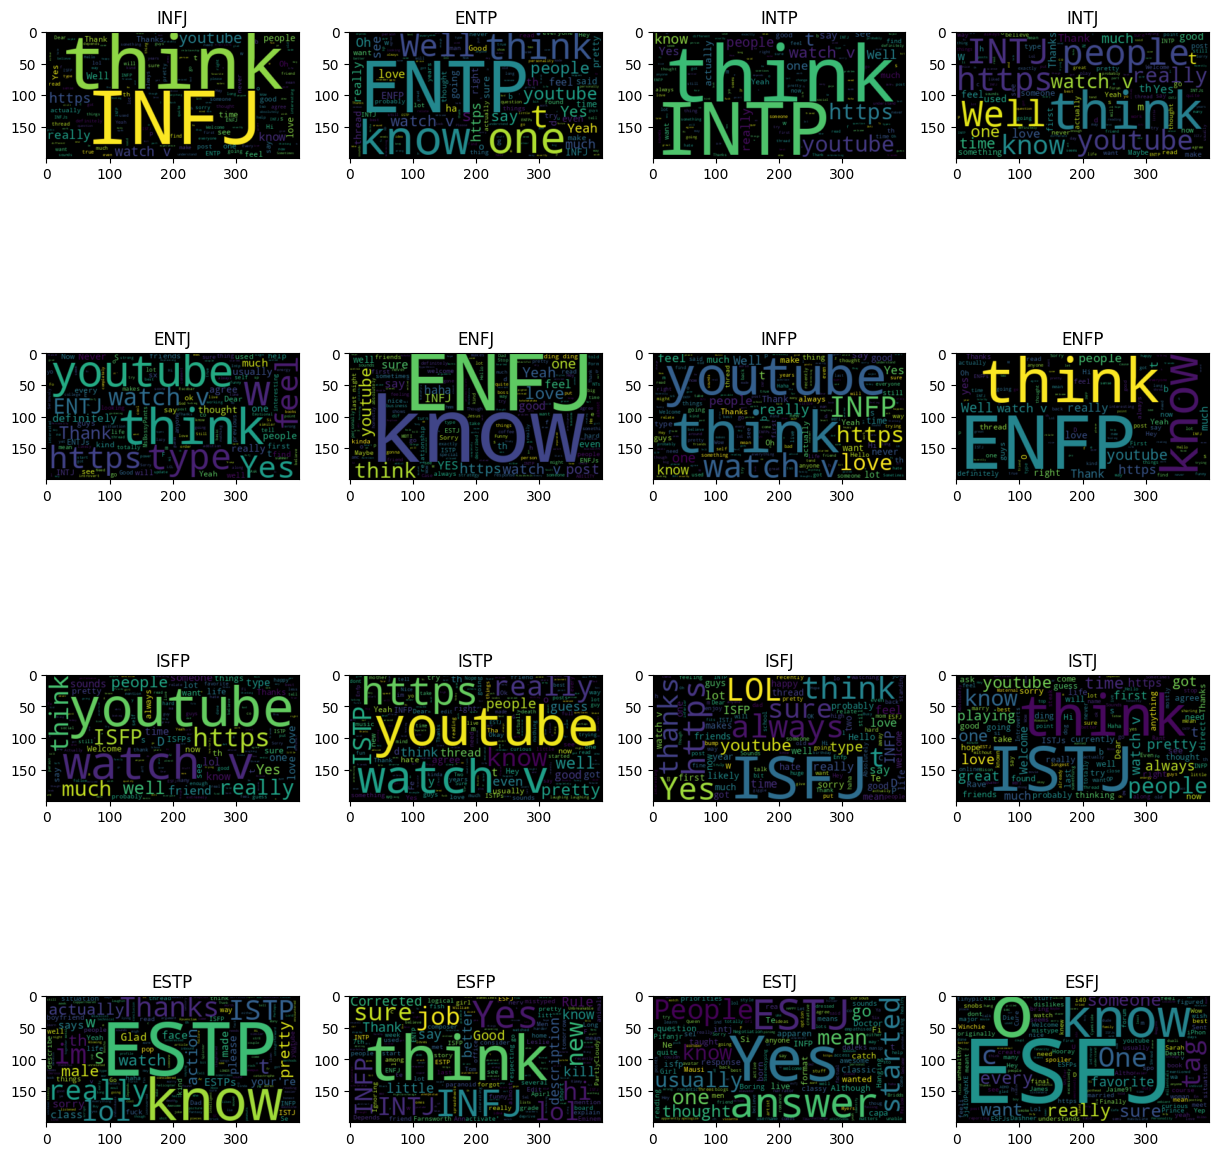

In [ ]:
fig, ax = plt.subplots(len(MBTI_DS['type'].unique()), figsize=(15,len(MBTI_DS['type'].unique())))
k = 0
for i in MBTI_DS['type'].unique():
    df_4 = MBTI_DS[MBTI_DS['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

There are a number of irrelevant words present in the dataset (e.g. ha, ar, Ti etx.) which will need to be removed. <br>
Interestingly, the most common words in the word clouds of individual personality types are the names of MBTI personlity types themselves. It would hence be necessary to clean our posts by removing these MBTI words from each of them as part of our pre-processing stage, before training the model for better evaluation results.

Since the original dataset only came with 2 features: the MBTI Type and 50 posts for each person, we create additional features for exploring & analysing our dataset.

In [ ]:
#add columns for personality type indicators

def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0

    if t[0] == 'I': I = 0
    elif t[0] == 'E': I = 1
    else: print('I-E not found')

    if t[1] == 'N': N = 0
    elif t[1] == 'S': N = 1
    else: print('N-S not found')

    if t[2] == 'F': T = 0
    elif t[2] == 'T': T = 1
    else: print('T-F not found')

    if t[3] == 'J': J = 0
    elif t[3] == 'P': J = 1
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'FT': T, 'JP': J })

MBTI_DS_N = MBTI_DS.join(MBTI_DS.apply (lambda row: get_types (row),axis=1))
MBTI_DS_N

,type,posts,IE,NS,FT,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,0,0
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,1,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,1,1
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,1,0
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,1,0
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,0,1,0,1
8671,ENFP,'So...if this thread already exists someplace ...,1,0,0,1
8672,INTP,'So many questions when i do these things. I ...,0,0,1,1
8673,INFP,'I am very conflicted right now when it comes ...,0,0,0,1


The above code assigns a value of 0 to individuals who possess the traits of Introversion (I), Intuition (N), Feeling (F), and Judging (J) on the four axes of the Myers-Briggs Type Indicator (MBTI) - Introversion-Extraversion (IE), Intuition-Sensing (NS), Feeling-Thinking (FT), and Judging-Perceiving (JP). All other individuals are assigned a value of 1. <br>

This allows us to calculate the number of posts that correspond to introverted (I) individuals versus extroverted (E) individuals out of all the entries in the labeled Kaggle dataset. Same goes to N/S, F/T, and J/P. <br>
This analysis is conducted to examine the dataset for each individual personality index of the MBTI.

In [ ]:
#Counting Number posts in one class | Total Number posts in other class

print ("Introversion (I) |  Extroversion (E): \t", MBTI_DS_N['IE'].value_counts()[0], " | ", MBTI_DS_N['IE'].value_counts()[1])
print ("Intuition    (N) |  Sensing      (S): \t", MBTI_DS_N['NS'].value_counts()[0], " | ", MBTI_DS_N['NS'].value_counts()[1])
print ("Feeling      (F) |  Thinking     (T): \t", MBTI_DS_N['FT'].value_counts()[0], " | ", MBTI_DS_N['FT'].value_counts()[1])
print ("Judging      (J) |  Perceiving   (P): \t", MBTI_DS_N['JP'].value_counts()[0], " | ", MBTI_DS_N['JP'].value_counts()[1])

Introversion (I) |  Extroversion (E): 	 6676  |  1999
Intuition    (N) |  Sensing      (S): 	 7478  |  1197
Feeling      (F) |  Thinking     (T): 	 4694  |  3981
Judging      (J) |  Perceiving   (P): 	 3434  |  5241


There is an uneven distribution of the entries in our dataset across the four axes of the MBTI, with E being the majority in the IE axis, S being the majority in the NS axis, and relatively less difference between T and F in the FT axis, and J and P in the JP axis.

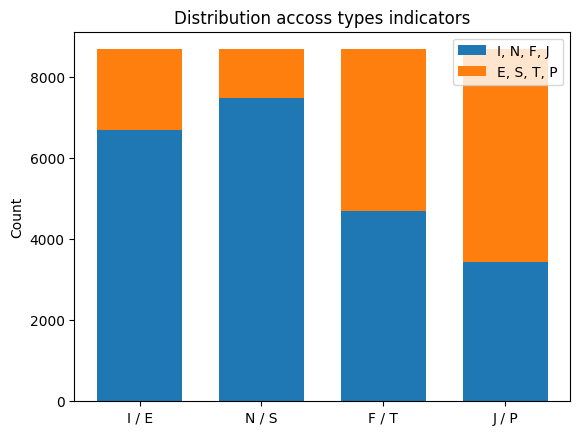

In [ ]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (MBTI_DS_N['IE'].value_counts()[0], MBTI_DS_N['NS'].value_counts()[0], MBTI_DS_N['FT'].value_counts()[0], MBTI_DS_N['JP'].value_counts()[0])
top = (MBTI_DS_N['IE'].value_counts()[1], MBTI_DS_N['NS'].value_counts()[1], MBTI_DS_N['FT'].value_counts()[1], MBTI_DS_N['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7

p1 = plt.bar(ind, bottom, width, label="I, N, F, J")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, T, P")

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'F / T', 'J / P',))
plt.legend()

plt.show()

<Axes: title={'center': 'Features Correlation Heatmap'}>

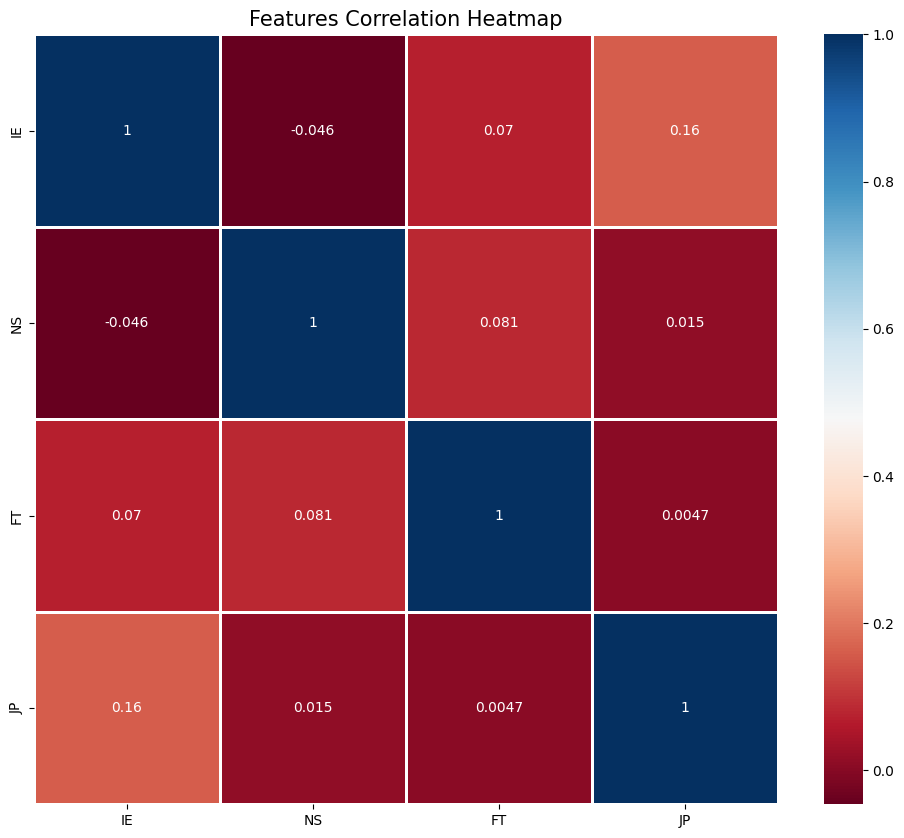

In [ ]:
cmap = plt.cm.RdBu
corr = MBTI_DS_N[['IE','NS','FT','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

From this correlation heatmap, it is unclear if it shows anything valuable for interpretation. <br>

# Data Preparation

Transforming MBTI Label into Binary Vector

In [ ]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # Transform MBTI to binary vector
    return [b_Pers[l] for l in personality]

#Show result output for personality prediction
def translate_back(personality):
    # transform binary vector to MBTI personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in MBTI_DS_N.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


Removing Stop Words, URLs and MBTI Words from Posts <br>
Lemmatization - Transforming Inflected Forms of the Words to their Base Forms

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

In [ ]:
data=MBTI_DS_N.copy(deep=True)

#converting all text/posts to lower case
data["posts"] = data["posts"].str.lower()

'''This function takes a list of texual data as input.
   It performs pre-processing and natural language processing on the data.
   It returns the processed textual data list as output.'''

#remove url links
for i in range(data.shape[0]):
    post_temp=data._get_value(i, 'posts')
    pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
    post_temp= re.sub(pattern, ' ', post_temp)
    data._set_value(i, 'posts',post_temp)

    pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
    post_temp=data._get_value(i, 'posts')
    post_temp= re.sub(pattern, ' ', post_temp)
    data._set_value(i, 'posts',post_temp)

#removing special characters and numbers from texts.
for i in range(data.shape[0]):
    post_temp=data._get_value(i, 'posts')
    pattern = re.compile('\W+')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[0-9]')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[_+]')
    post_temp= re.sub(pattern, ' ', post_temp)
    data._set_value(i, 'posts',post_temp)

# removing extra spaces from texts.
for i in range(data.shape[0]):
    post_temp=data._get_value(i, 'posts')
    pattern = re.compile('\s+')
    post_temp= re.sub(pattern, ' ', post_temp)
    data._set_value(i, 'posts', post_temp)

#remove stop words
remove_words = stopwords.words("english")
for i in range(data.shape[0]):
    post_temp=data._get_value(i, 'posts')
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
    data._set_value(i, 'posts', post_temp)

#remove mbti personality words from text
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(data.shape[0]):
    post_temp=data._get_value(i, 'posts')
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
    data._set_value(i, 'posts', post_temp)

#Lemmatization (grouping similar words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for i in range(data.shape[0]):
    post_temp=data._get_value(i, 'posts')
    post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
    data._set_value(i, 'posts', post_temp)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#data before preprocessing
print("Before preprocessing :", MBTI_DS_N.iloc[10,1], "\n")
#data after preprocessing
print("After preprocessing :", data.iloc[10,1], "\n")

Before preprocessing : 'One time my parents were fighting over my dad's affair and my dad pushed my mom. The fall broke her finger.  She's pointed a gun at him and made him get on his knees and beg for his life. She's...|||I'm gonna talk about what a piece of shit my dad is now.  He's an alcoholic and he has some kind of serious mental problem when it comes to complying with the IRS. (In his words, Laws don't apply...|||OMG...at the women's center I lived at, run by a Catholic charity, the fat bully program manager took it upon herself to change policy so that tenants were FORCED to attend the Christmas party. If...|||I don't work, but I have a calling I am 100% committed to 24/7 with no vacation or off days EVER. I'm a Kundalini mystic.  Oh, I don't get paid, either!  It's one of those destined things...|||My art teacher in high school had a stack of art school catalogs. When I saw the one for the school I ended up going to, I immediately knew that was the one. Without any research. I


Feature Selection using Count Vectorizer & TF-IDF Vectorizer

To determine the relevance of a word in a document or corpus, we vectorize the text into matrix form using both count vectorizer and TF-IDF vectorizer while only keeping words that appear between 10-70% of the posts.

In [ ]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word",
                          max_features=1500,
                          min_df=0.1,
                          max_df=0.7)
# the feature should be made of word n-gram

# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(data.iloc[:,1])

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accept'), (4, 'accurate'), (5, 'across'), (6, 'act'), (7, 'action'), (8, 'actual'), (9, 'actually')]

Using Tf-idf :
Now the dataset size is as below
(8675, 797)


This means that the TF-IDF matrix has 8675 dimensions and each dimension has 797 elements.

Splitting into X and Y Variables <br>
X: User Posts in TF-IDF representation <br>
Y: Personality type in binarized MBTI form

In [ ]:
personality_type = [ "IE: Introversion (I) | Extroversion (E)", "NS: Intuition    (N) | Sensing      (S)",
                   "FT: Feeling      (F) | Thinking     (T)", "JP: Judging      (J) | Perceiving   (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) | Extroversion (E)
NS: Intuition    (N) | Sensing      (S)
FT: Feeling      (F) | Thinking     (T)
JP: Judging      (J) | Perceiving   (P)


Let's see how the posts look in TF-IDF representation: (we have taken 1st post for demonstration)

In [ ]:
print("X: First post in tf-idf representation\n%s" % X_tfidf[0])

X: First post in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08045869 0.06833326 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10336238 0.         0.04975667 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10985765 0.         0.         0.         0.08646442
 0.         0.         0.10493721 0.         0.         0.
 0.         0.         0.05191247 0.06827841 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.      

Let's see how the posts look in binarized MBTI personality indicator representation: (we have taken 1st post for demonstration)

In [ ]:
print("For MBTI personality type : %s" % translate_back(list_personality_bin[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality_bin[0,:])

For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


Now we have successfully converted the textual data into numerical form.

# Modeling and Evaluation

In [ ]:
X = X_tfidf
Y = list_personality_bin
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X, Y[:,0], test_size=0.2, random_state=123,stratify=Y)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X, Y[:,1], test_size=0.2, random_state=123,stratify=Y)
X_train_FT, X_test_FT, Y_train_FT, Y_test_FT = train_test_split(X, Y[:,2], test_size=0.2, random_state=123,stratify=Y)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X, Y[:,3], test_size=0.2, random_state=123,stratify=Y)

In [ ]:
#Function to print Classification Report of the given model
'''This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models). '''

def print_classification_report(ypredIE, ypredNS, ypredFT, ypredJP):
    # Classification Report for Introversion(I) / Extroversion(E)
    print("Classification Report for Introversion(I) / Extroversion(E): \n ")
    print(classification_report(Y_test_IE, ypredIE))
    accuracyIE=accuracy_score(Y_test_IE,ypredIE)
    print("Accuracy for Introversion(I) / Extroversion(E): ",accuracyIE, "\n")
    print("\n")

    # Classification Report for Intuition(N) / Sensing(S)
    print("Classification Report for Intuition(N) / Sensing(S): \n ")
    print(classification_report(Y_test_NS, ypredNS))
    accuracyNS=accuracy_score(Y_test_NS,ypredNS)
    print("Accuracy for Intuition(N) / Sensing(S): ", accuracyNS, "\n")
    print("\n")

    # Classification Report for Feeling(F) / Thinking(T)
    print("Classification Report for Feeling(F) / Thinking(T): \n ")
    print(classification_report(Y_test_FT, ypredFT))
    accuracyFT=accuracy_score(Y_test_FT,ypredFT)
    print("Accuracy for Feeling(F) / Thinking(T): ", accuracyFT, "\n")
    print("\n")

    # Classification Report for Judging(J) / Perceiving(P)
    print("Classification Report for Judging(J) / Perceiving(P): \n ")
    print(classification_report(Y_test_JP, ypredJP))
    accuracyJP=accuracy_score(Y_test_JP,ypredJP)
    print("Accuracy for Judging(J) / Perceiving(P): ",accuracyJP, "\n")
    print("\n")

# Function to print Confusion matrix for the given model
'''This function takes 4 predicted output datasets as input.
   It computes confusion matrix.
   It prints confusion matrix for all 4 predictions (models). '''

def print_confusion_matrix(ypredIE, ypredNS, ypredFT, ypredJP):
    # Confusion matrix for Introversion(I) / Extroversion(E):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_IE, ypredIE)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Blues_r');
    plt.ylabel('Y_test_IE');
    plt.xlabel('ypredIE');
    plt.title("Confusion matrix for Introversion(I) / Extroversion(E): ", size = 17);
    plt.show()

    #Confusion matrix for Intuition(N) / Sensing(S):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_NS, ypredNS)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Greens_r');
    plt.ylabel('Y_test_NS');
    plt.xlabel('ypredNS');
    plt.title("Confusion matrix for Intuition(N) / Sensing(S): ", size = 17);
    plt.show()

    #Confusion matrix for Feeling(F) / Thinking(T):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_FT, ypredFT)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Reds_r');
    plt.ylabel('Y_test_FT');
    plt.xlabel('ypredFT');
    plt.title("Confusion matrix for Feeling(F) / Thinking(T): ", size = 17);
    plt.show()

    #Confusion matrix for Judging(J) / Perceiving(P):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_JP, ypredJP)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Purples_r');
    plt.ylabel('Y_test_JP');
    plt.xlabel('ypredJP');
    plt.title("Confusion matrix for Judging(J) / Perceiving(P): ", size = 17);
    plt.show()


#Function to print roc_auc_curve for the given model
'''This function takes 4 predicted probabilitie datasets as input.
   It plots ROC Curve for all 4 predictions (models). '''

def print_roc_auc_curve(probIE, probNS, probFT, probJP):

    fp_IE, tp_IE, val = roc_curve(Y_test_IE, probIE[:,1])
    fp_NS, tp_NS, val = roc_curve(Y_test_NS, probNS[:,1])
    fp_FT, tp_FT, val = roc_curve(Y_test_FT, probFT[:,1])
    fp_JP, tp_JP, val = roc_curve(Y_test_JP, probJP[:,1])

    plt.figure()
    plt.plot(fp_IE, tp_IE, linestyle='--', color='red', label='Introversion(I) / Extroversion(E)')
    plt.plot(fp_NS, tp_NS, linestyle='--', color='blue', label='Intuition(N) / Sensing(S)')
    plt.plot(fp_FT, tp_FT, linestyle='--', color='pink', label='Feeling(F) / Thinking(T)')
    plt.plot(fp_JP, tp_JP, linestyle='--', color='green', label='Judging(J) / Perceiving(P)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

### Naive Bayes

In [ ]:
# Function to perform stratified cross-validation and get predictions
def cross_val_predict_and_report(model, X, y, cv=5, name=None):
    skf = StratifiedKFold(n_splits=cv)
    y_pred = cross_val_predict(model, X, y, cv=skf)
    print(classification_report(y, y_pred))
    accuracy=accuracy_score(y,y_pred)
    print(f"Accuracy for {name}:", accuracy)
    return y_pred, accuracy

# Initialize Gaussian Naive Bayes classifier
naivegb = GaussianNB()

# Perform cross-validation and get predictions for each dimension
ypredIE_nb, accuracyIE = cross_val_predict_and_report(naivegb, X_train_IE, Y_train_IE, name='I/E')
ypredNS_nb, accuracyNS = cross_val_predict_and_report(naivegb, X_train_NS, Y_train_NS, name='N/S')
ypredFT_nb, accuracyFT = cross_val_predict_and_report(naivegb, X_train_FT, Y_train_FT, name='F/T')
ypredJP_nb, accuracyJP = cross_val_predict_and_report(naivegb, X_train_JP, Y_train_JP, name='J/P')

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      5342
           1       0.39      0.60      0.47      1598

    accuracy                           0.69      6940
   macro avg       0.62      0.66      0.62      6940
weighted avg       0.75      0.69      0.71      6940

Accuracy for I/E: 0.6881844380403458
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      5983
           1       0.24      0.55      0.34       957

    accuracy                           0.70      6940
   macro avg       0.58      0.64      0.57      6940
weighted avg       0.82      0.70      0.74      6940

Accuracy for N/S: 0.7025936599423631
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      3755
           1       0.72      0.73      0.73      3185

    accuracy                           0.75      6940
   macro avg       0.75      0.75      0.75      6940


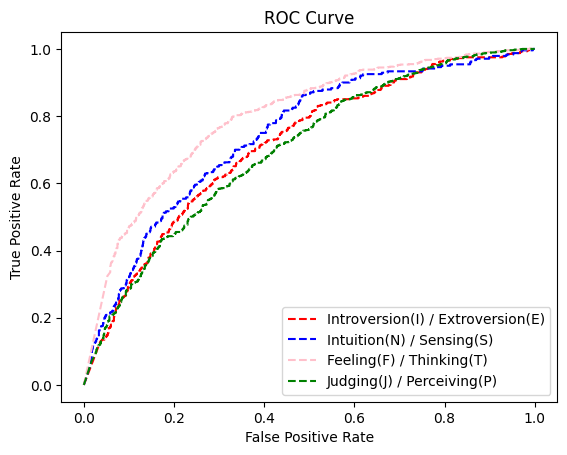

In [ ]:
# Calculate probabilities for each dimension
probIE = naivegb.fit(X_train_IE, Y_train_IE).predict_proba(X_test_IE)
probNS = naivegb.fit(X_train_NS, Y_train_NS).predict_proba(X_test_NS)
probFT = naivegb.fit(X_train_FT, Y_train_FT).predict_proba(X_test_FT)
probJP = naivegb.fit(X_train_JP, Y_train_JP).predict_proba(X_test_JP)

# Plot ROC-AUC curves for each dimension
print_roc_auc_curve(probIE, probNS, probFT, probJP)

### Logistic Regression

Best hyperparameters for IE: {'C': 1, 'solver': 'liblinear'}
Best hyperparameters for NS: {'C': 1, 'solver': 'lbfgs'}
Best hyperparameters for FT: {'C': 1, 'solver': 'liblinear'}
Best hyperparameters for JP: {'C': 1, 'solver': 'lbfgs'}
Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1334
           1       0.68      0.23      0.35       401

    accuracy                           0.80      1735
   macro avg       0.74      0.60      0.61      1735
weighted avg       0.78      0.80      0.76      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7971181556195965 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1495
           1       0.67      0.03      0.05       240

    accuracy                           0.86      1735
   macro avg       0.77    

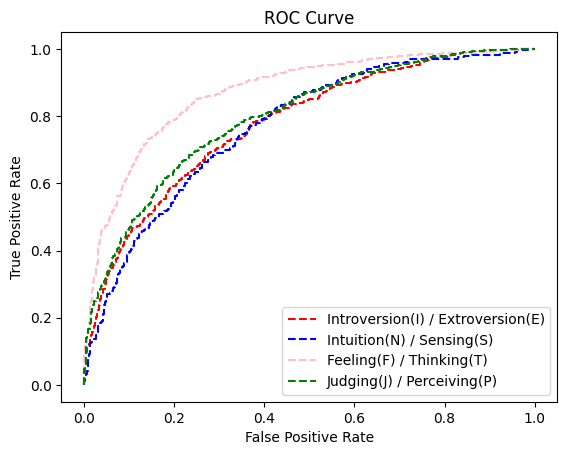

In [ ]:
# Logistic regression with a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']  # Solver algorithms
    # If using L1 regulation with lbfgs, sag, or saga, use 'penalty': ['l1', 'l2']
}

# Function to perform Grid Search
def perform_grid_search(estimator, param_grid, X_train, y_train, X_test, cv=5, n_jobs=-1):
    grid_search = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=n_jobs)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    prob = best_model.predict_proba(X_test)
    return y_pred, grid_search.best_params_, prob

# Perform grid search in parallel and predict for each model
ypredIE, best_params_IE, probIE = perform_grid_search(LogisticRegression(max_iter=500), param_grid, X_train_IE, Y_train_IE, X_test_IE)
ypredNS, best_params_NS, probNS = perform_grid_search(LogisticRegression(max_iter=500), param_grid, X_train_NS, Y_train_NS, X_test_NS)
ypredFT, best_params_FT, probFT = perform_grid_search(LogisticRegression(max_iter=500), param_grid, X_train_FT, Y_train_FT, X_test_FT)
ypredJP, best_params_JP, probJP = perform_grid_search(LogisticRegression(max_iter=500), param_grid, X_train_JP, Y_train_JP, X_test_JP)

# Display the best hyperparameters for each model
print("Best hyperparameters for IE:", best_params_IE)
print("Best hyperparameters for NS:", best_params_NS)
print("Best hyperparameters for FT:", best_params_FT)
print("Best hyperparameters for JP:", best_params_JP)

print_classification_report(ypredIE, ypredNS, ypredFT, ypredJP)

# Plot ROC-AUC curves for each personality dimension
print_roc_auc_curve(probIE, probNS, probFT, probJP)

### Random Forest

In [ ]:
# Define parameter grid. The following are just examples.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 10],
}

# Define your train and search function
def train_search_rf(X_train, y_train, param_grid, cv=5, n_jobs=-1, random_state=123):
    rf = RandomForestClassifier(random_state=random_state)
    grid_search = GridSearchCV(rf, param_grid, cv=cv, n_jobs=n_jobs)
    grid_search.fit(X_train, y_train)
    return grid_search

# Run training and predictions in parallel
with Parallel(n_jobs=-1) as parallel:
    grid_searches = parallel(delayed(train_search_rf)(X_train, y_train, param_grid)
                             for X_train, y_train in [(X_train_IE, Y_train_IE),
                                                      (X_train_NS, Y_train_NS),
                                                      (X_train_FT, Y_train_FT),
                                                      (X_train_JP, Y_train_JP)])

# Extract the best estimators and make predictions
predictions = [grid_search.best_estimator_.predict(X_test)
               for grid_search, X_test in zip(grid_searches, [X_test_IE, X_test_NS, X_test_FT, X_test_JP])]

# Print classification report for each axis
axes = ['IE', 'NS', 'FT', 'JP']
for axis, y_test, y_pred in zip(axes, [Y_test_IE, Y_test_NS, Y_test_FT, Y_test_JP], predictions):
    print(f"Classification report for {axis} axis:")
    print(classification_report(y_test, y_pred))
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy score for {axis} axis: ", accuracy)

Classification report for IE axis:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1334
           1       0.00      0.00      0.00       401

    accuracy                           0.77      1735
   macro avg       0.38      0.50      0.43      1735
weighted avg       0.59      0.77      0.67      1735

Accuracy score for IE axis:  0.7688760806916427
Classification report for NS axis:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1495
           1       0.00      0.00      0.00       240

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.80      1735

Accuracy score for NS axis:  0.861671469740634
Classification report for FT axis:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       939
           1       0.83      0.61    

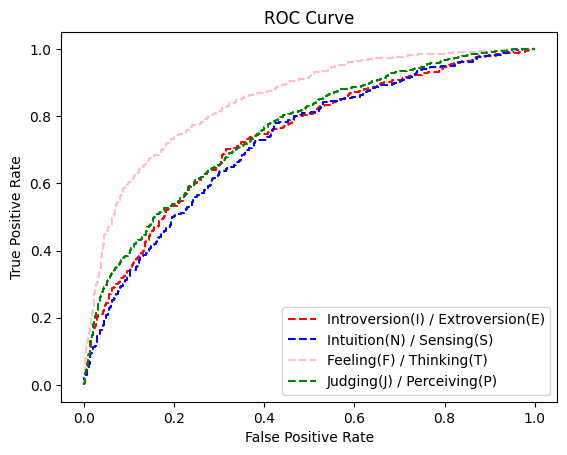

In [ ]:
# Extract the best estimators and make predictions
best_estimators = [grid_search.best_estimator_ for grid_search in grid_searches]

# Calculate probabilities for each dimension
probIE = best_estimators[0].predict_proba(X_test_IE)
probNS = best_estimators[1].predict_proba(X_test_NS)
probFT = best_estimators[2].predict_proba(X_test_FT)
probJP = best_estimators[3].predict_proba(X_test_JP)

# Plot ROC-AUC curves for each dimension using the provided function
print_roc_auc_curve(probIE, probNS, probFT, probJP)

## K-Nearest Neighbor

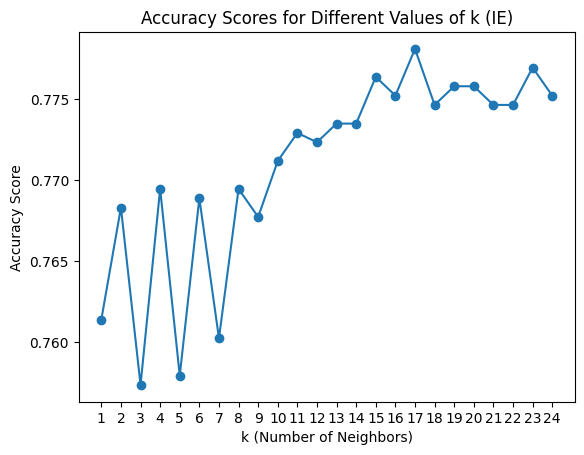

Maximum Accuracy of 0.7780979827089337 at k=17


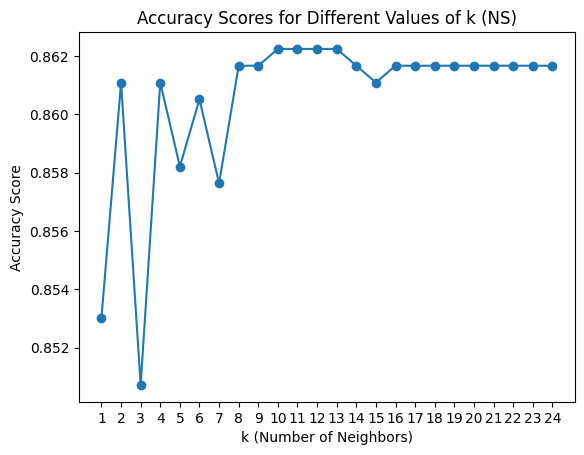

Maximum Accuracy of 0.8622478386167147 at k=10


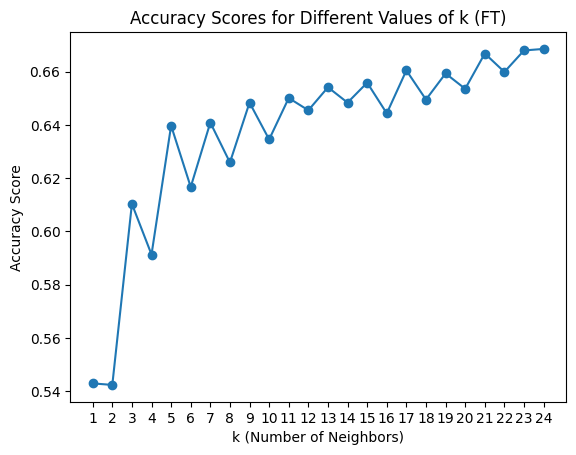

Maximum Accuracy of 0.6685878962536023 at k=24


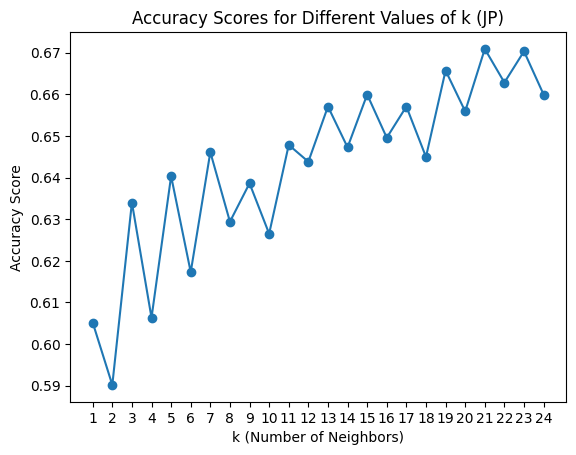

Maximum Accuracy of 0.6708933717579251 at k=21


In [ ]:
def find_best_k_and_plot(X_train, Y_train, X_test, Y_test, personality_type):
    k_scores = []

    # Try different values of k
    for i in range(1, 25):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        y_pred = knn.predict(X_test)
        score = accuracy_score(Y_test, y_pred)
        k_scores.append(score)

    # Plot the results
    plt.figure()
    plt.plot(range(1, 25), k_scores, marker='o')
    plt.ylabel('Accuracy Score')
    plt.xlabel('k (Number of Neighbors)')
    plt.title(f'Accuracy Scores for Different Values of k ({personality_type})')
    plt.xticks(range(1, 25))
    plt.show()

    # Find the value of k that gives the highest score
    best_k = k_scores.index(max(k_scores)) + 1
    print(f'Maximum Accuracy of {max(k_scores)} at k={best_k}')

    return best_k

# Use the utility function to find the best k for each personality type
best_k_IE = find_best_k_and_plot(X_train_IE, Y_train_IE, X_test_IE, Y_test_IE, 'IE')
best_k_NS = find_best_k_and_plot(X_train_NS, Y_train_NS, X_test_NS, Y_test_NS, 'NS')
best_k_FT = find_best_k_and_plot(X_train_FT, Y_train_FT, X_test_FT, Y_test_FT, 'FT')
best_k_JP = find_best_k_and_plot(X_train_JP, Y_train_JP, X_test_JP, Y_test_JP, 'JP')

# Function to train and predict using the best k
def train_and_predict_with_best_k(X_train, Y_train, X_test, best_k):
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)

    return y_pred, y_prob

# Train and predict with the best k for IE type
ypredIE, probIE = train_and_predict_with_best_k(X_train_IE, Y_train_IE, X_test_IE, best_k_IE)
ypredNS, probNS = train_and_predict_with_best_k(X_train_NS, Y_train_NS, X_test_NS, best_k_NS)
ypredFT, probFT = train_and_predict_with_best_k(X_train_FT, Y_train_FT, X_test_FT, best_k_FT)
ypredJP, probJP = train_and_predict_with_best_k(X_train_JP, Y_train_JP, X_test_JP, best_k_JP)

In [ ]:
print_classification_report(ypredIE, ypredNS, ypredFT, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1334
           1       0.65      0.08      0.15       401

    accuracy                           0.78      1735
   macro avg       0.72      0.54      0.51      1735
weighted avg       0.75      0.78      0.71      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7780979827089337 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1495
           1       1.00      0.00      0.01       240

    accuracy                           0.86      1735
   macro avg       0.93      0.50      0.47      1735
weighted avg       0.88      0.86      0.80      1735

Accuracy for Intuition(N) / Sensing(S):  0.8622478386167147 



Classification Report for Feeling(F) / Thinking(T): 
 
              precision    recall  

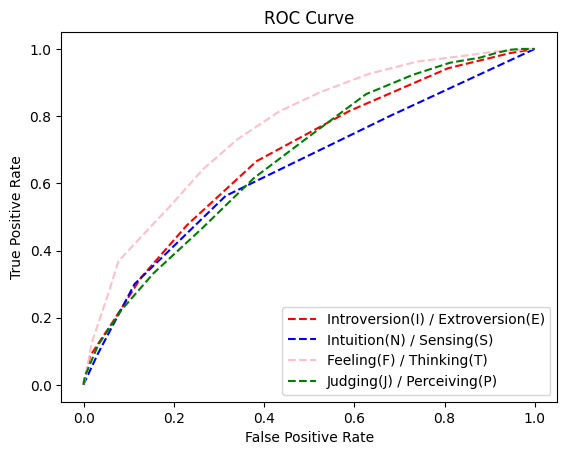

In [ ]:
#Plot ROC curve
print_roc_auc_curve(probIE, probNS, probFT, probJP)

### Stochastic Gradient Descent

Best hyperparameters for IE: {'alpha': 0.0001, 'loss': 'log'}
Best hyperparameters for NS: {'alpha': 0.001, 'loss': 'modified_huber'}
Best hyperparameters for FT: {'alpha': 0.01, 'loss': 'modified_huber'}
Best hyperparameters for JP: {'alpha': 0.0001, 'loss': 'log'}
Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1334
           1       0.69      0.21      0.32       401

    accuracy                           0.80      1735
   macro avg       0.74      0.59      0.60      1735
weighted avg       0.78      0.80      0.75      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7953890489913544 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1495
           1       0.78      0.03      0.06       240

    accuracy                           0.86      1

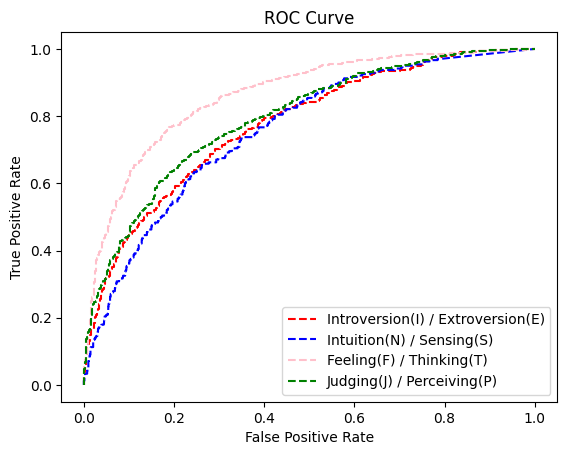

In [ ]:
# Define hyperparameters grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # regularization parameter
    'loss': ['log', 'modified_huber']  # log functions
}

# Function to perform Grid Search
def perform_grid_search_and_predict(estimator, param_grid, X_train, y_train, X_test, cv=5, n_jobs=-1):
    grid_search = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=n_jobs)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    prob = best_model.predict_proba(X_test)
    return y_pred, grid_search.best_params_, prob

# Apply the function to each dimension and obtain predictions along with best parameters
ypredIE, best_params_IE, probIE = perform_grid_search_and_predict(SGDClassifier(), param_grid, X_train_IE, Y_train_IE, X_test_IE)
ypredNS, best_params_NS, probNS = perform_grid_search_and_predict(SGDClassifier(), param_grid, X_train_NS, Y_train_NS, X_test_NS)
ypredFT, best_params_FT, probFT = perform_grid_search_and_predict(SGDClassifier(), param_grid, X_train_FT, Y_train_FT, X_test_FT)
ypredJP, best_params_JP, probJP = perform_grid_search_and_predict(SGDClassifier(), param_grid, X_train_JP, Y_train_JP, X_test_JP)

# Display the best hyperparameters for each model
print("Best hyperparameters for IE:", best_params_IE)
print("Best hyperparameters for NS:", best_params_NS)
print("Best hyperparameters for FT:", best_params_FT)
print("Best hyperparameters for JP:", best_params_JP)

# Classification report
print_classification_report(ypredIE, ypredNS, ypredFT, ypredJP)

# Plot ROC-AUC curves for each personality dimension
print_roc_auc_curve(probIE, probNS, probFT, probJP)

### Support Vector Classifier

Classification report for IE axis:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1334
           1       0.73      0.15      0.24       401

    accuracy                           0.79      1735
   macro avg       0.76      0.57      0.56      1735
weighted avg       0.78      0.79      0.73      1735

Accuracy score for IE axis:  0.7902017291066282
Classification report for NS axis:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1495
           1       0.00      0.00      0.00       240

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.80      1735

Accuracy score for NS axis:  0.861671469740634
Classification report for FT axis:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       939
           1       0.77      0.76    

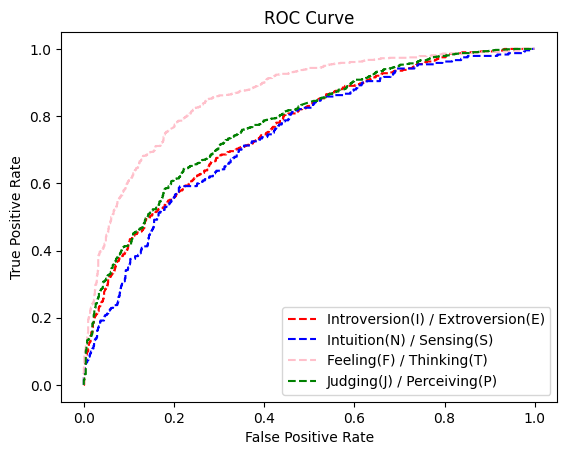

In [ ]:
# Define a function to train SVM and make predictions
def train_predict_svm(X_train, y_train, X_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # SVMs benefit from scaled data
        ('svm', SVC(random_state=123, probability=True))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    prob = pipeline.predict_proba(X_test)
    return y_pred, prob

# Train and predict for all four axes
ypredIE, probIE = train_predict_svm(X_train_IE, Y_train_IE, X_test_IE)
ypredNS, probNS = train_predict_svm(X_train_NS, Y_train_NS, X_test_NS)
ypredFT, probFT = train_predict_svm(X_train_FT, Y_train_FT, X_test_FT)
ypredJP, probJP = train_predict_svm(X_train_JP, Y_train_JP, X_test_JP)

# Print classification report for each axis
axes = ['IE', 'NS', 'FT', 'JP']
for axis, y_test, y_pred in zip(axes, [Y_test_IE, Y_test_NS, Y_test_FT, Y_test_JP], [ypredIE, ypredNS, ypredFT, ypredJP]):
    print(f"Classification report for {axis} axis:")
    print(classification_report(y_test, y_pred))
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy score for {axis} axis: ", accuracy)

# Plot ROC-AUC curves for each personality dimension
print_roc_auc_curve(probIE, probNS, probFT, probJP)